# Sign Language Classifier Deep Learning Model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

## Read and Explore Dataset

In [3]:
train_dataset = pd.read_csv('/content/gdrive/My Drive/kaggle_dataset/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_dataset = pd.read_csv('/content/gdrive/My Drive/kaggle_dataset/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [4]:
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [5]:
list(sorted(train_dataset['label'].unique()))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [6]:
train_dataset.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
test_dataset.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
train_dataset.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


## Spliting the Data into train and test data

In [10]:
train_images = np.array(train_dataset.iloc[:,1:])
train_label = np.array(train_dataset.iloc[:,0])

test_images = np.array(test_dataset.iloc[:,1:])
test_label = np.array(test_dataset.iloc[:,0])

In [11]:
train_images = train_images/255
test_images = test_images/255

In [12]:
train_images.shape

(27455, 784)

## Viewing First 4 images

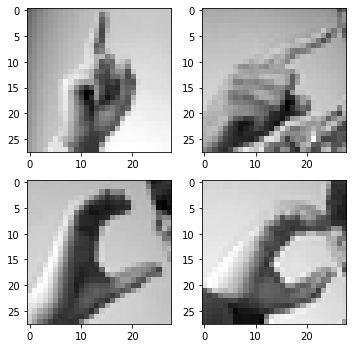

In [13]:
fig, ax = plt.subplots(2,2) 
fig.set_size_inches(5, 5)
k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(train_images[k].reshape(28,28), cmap= 'gray')

        k += 1
    plt.tight_layout()

## Train Lables vs Occurance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


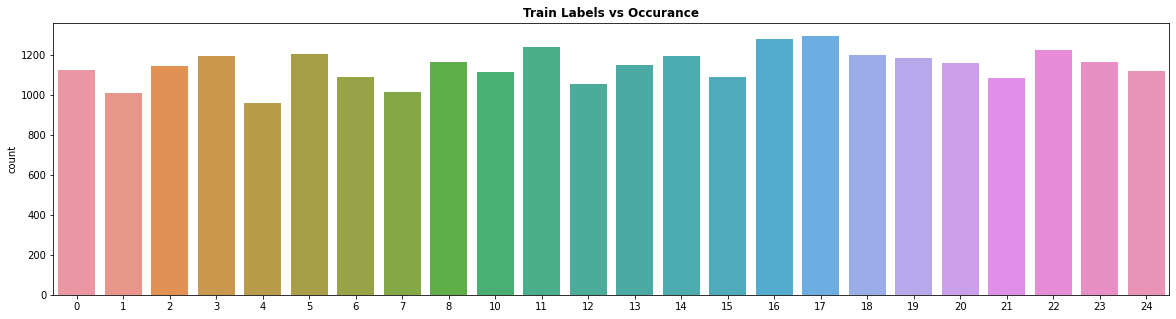

In [14]:
plt.figure(figsize=(20,5))
plt.title('Train Labels vs Occurance', fontweight='bold')
sn.countplot(train_label)
plt.show()

## Reshape the Data

In [15]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [16]:
train_label = np.array(pd.get_dummies(train_label))
test_label = np.array(pd.get_dummies(test_label))

## Data Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range=5,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=False,
                                vertical_flip=False,
                                fill_mode='nearest') 

## Building Model

In [18]:
from keras.layers import Dense, Dropout,Conv2D, Flatten, MaxPool2D
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128, kernel_size = (5,5), padding = 'same', activation= 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size = (5,5), padding = 'same', activation = 'relu'))

In [20]:
model.add(Flatten())

model.add(Dense(units = 256, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, kernel_initializer = 'he_uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [22]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss = 'categorical_crossentropy')

In [23]:
model.fit(data_gen.flow(train_images, train_label, batch_size=200), validation_data=(test_images, test_label),epochs=50)

Epoch 1/50
138/138 [==============================] - 11s 72ms/step - loss: 3.1751 - accuracy: 0.0481 - val_loss: 2.9324 - val_accuracy: 0.1161
Epoch 2/50
138/138 [==============================] - 9s 67ms/step - loss: 2.7186 - accuracy: 0.1694 - val_loss: 1.5097 - val_accuracy: 0.5236
Epoch 3/50
138/138 [==============================] - 9s 69ms/step - loss: 1.6591 - accuracy: 0.4369 - val_loss: 0.6932 - val_accuracy: 0.7656
Epoch 4/50
138/138 [==============================] - 9s 67ms/step - loss: 1.0375 - accuracy: 0.6410 - val_loss: 0.3801 - val_accuracy: 0.8818
Epoch 5/50
138/138 [==============================] - 9s 67ms/step - loss: 0.6788 - accuracy: 0.7656 - val_loss: 0.3148 - val_accuracy: 0.8992
Epoch 6/50
138/138 [==============================] - 9s 67ms/step - loss: 0.4793 - accuracy: 0.8351 - val_loss: 0.1245 - val_accuracy: 0.9544
Epoch 7/50
138/138 [==============================] - 9s 67ms/step - loss: 0.3466 - accuracy: 0.8842 - val_loss: 0.1295 - val_accuracy: 0.956

## Accuracy Of Model

In [25]:
print("Accuracy of Model :-> ", model.evaluate(test_images, test_label)[1]*100,"%")

225/225 [==============================] - 1s 4ms/step - loss: 0.0344 - accuracy: 0.9904
Accuracy of Model :->  99.0379273891449 %
